<a href="https://colab.research.google.com/github/shivam9887631/placement-management-system/blob/main/SharkTankUs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-62bbd7b9c70c>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[numerical_columns] = filtered_data[numerical_columns].fillna(0)
<ipython-input-14-62bbd7b9c70c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[categorical_columns] = filtered_data[categorical_columns].fillna("Unknown")


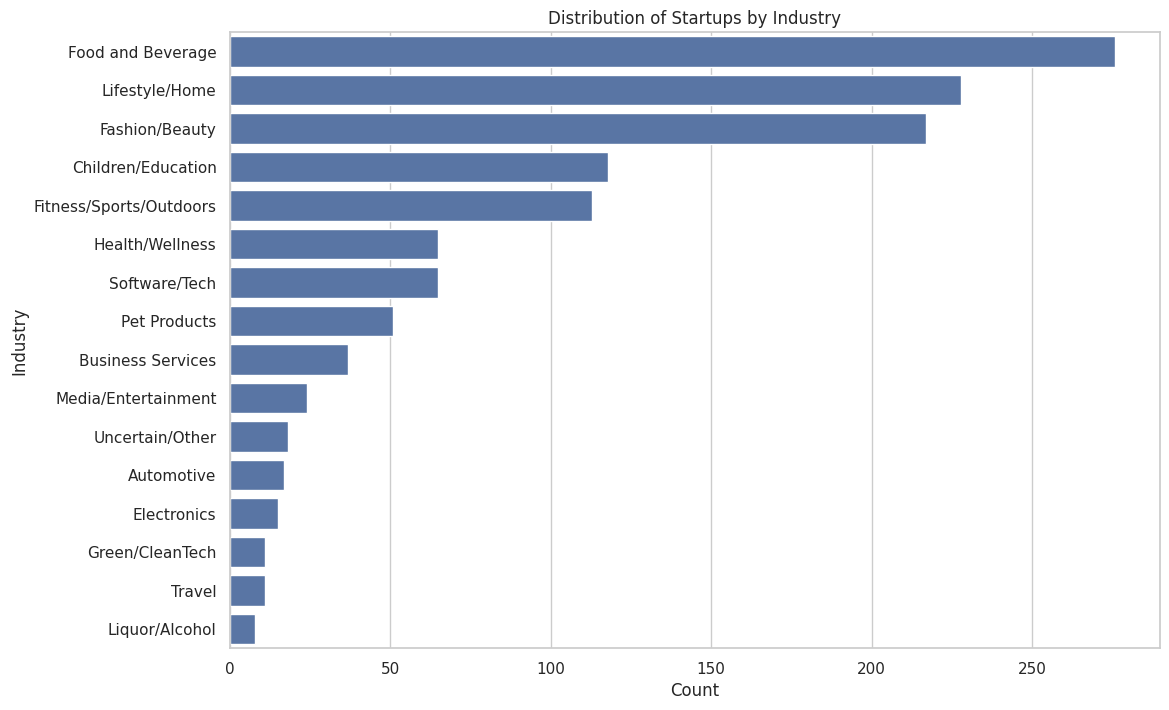

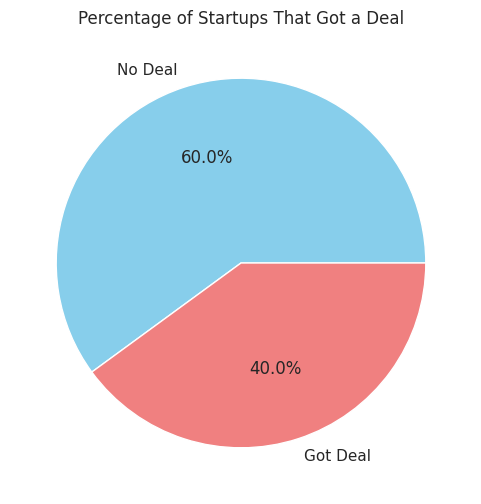

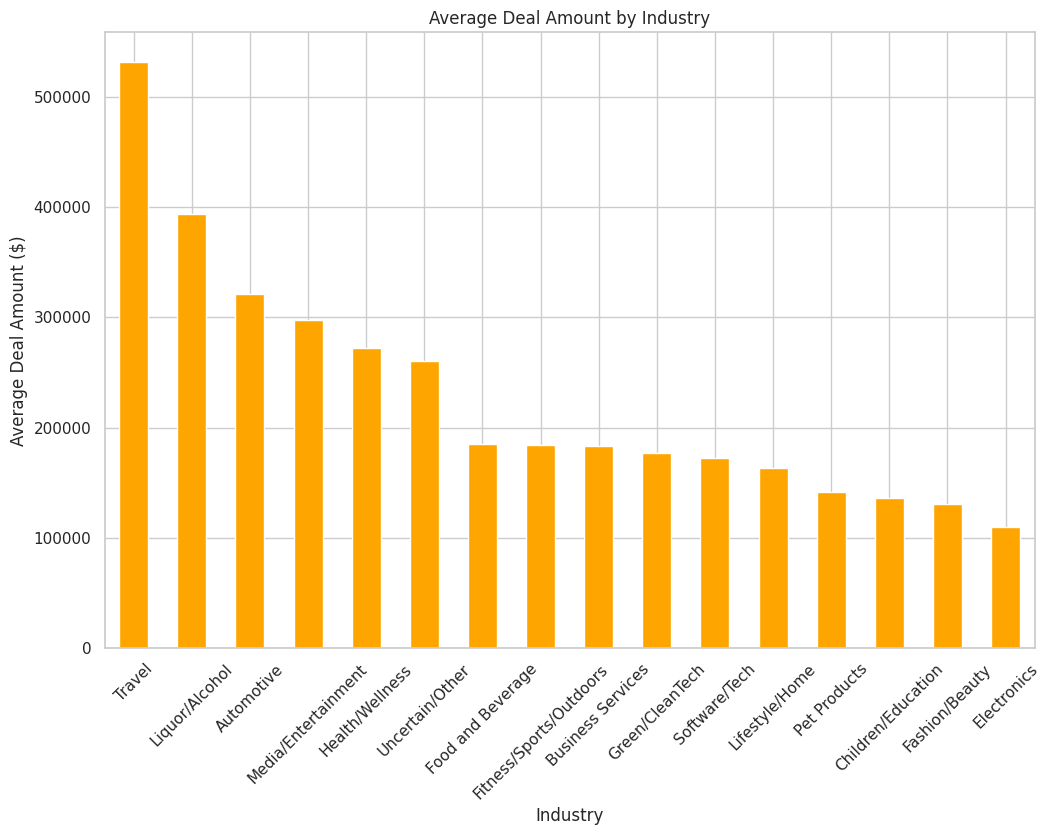

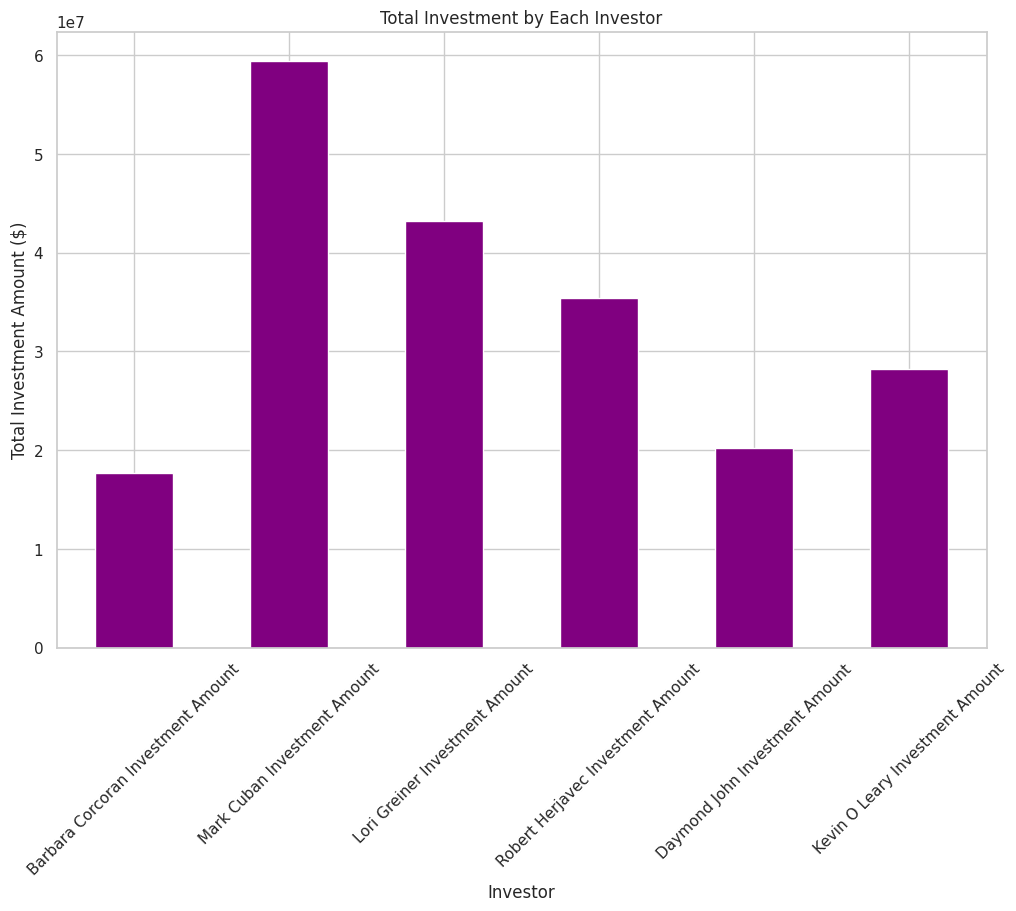

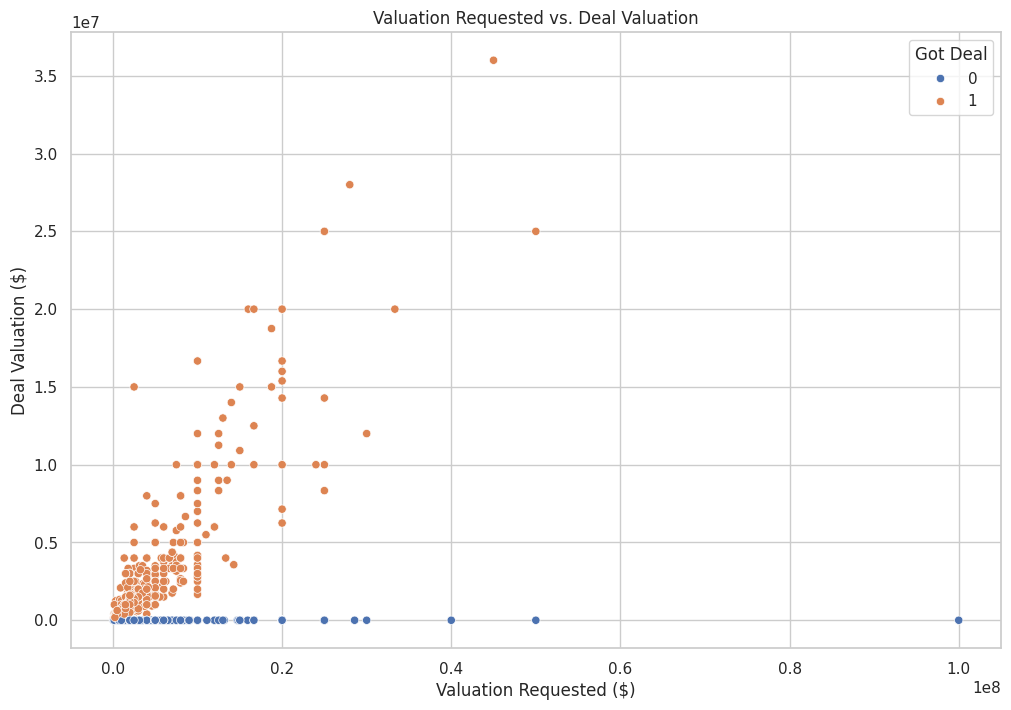

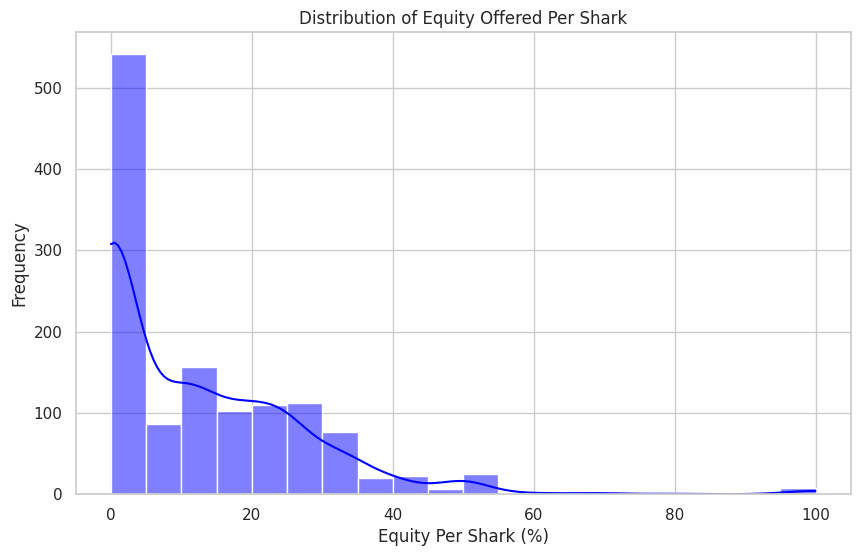

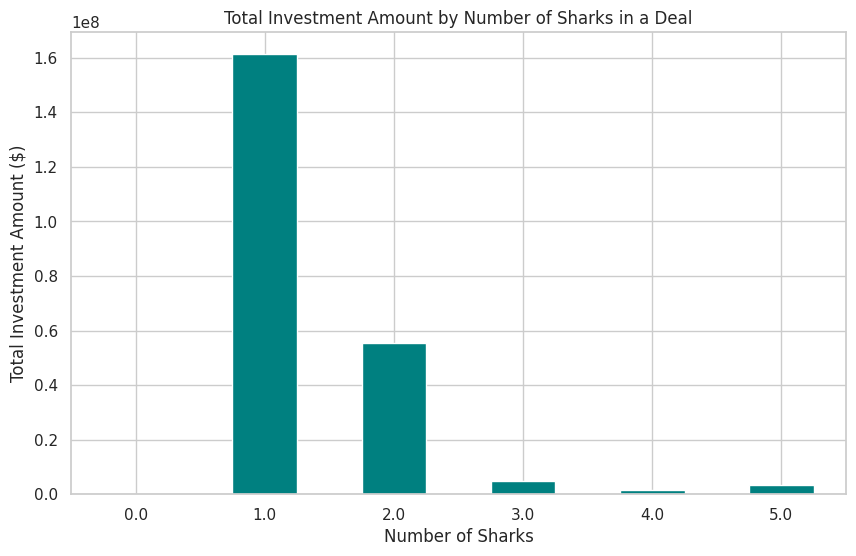

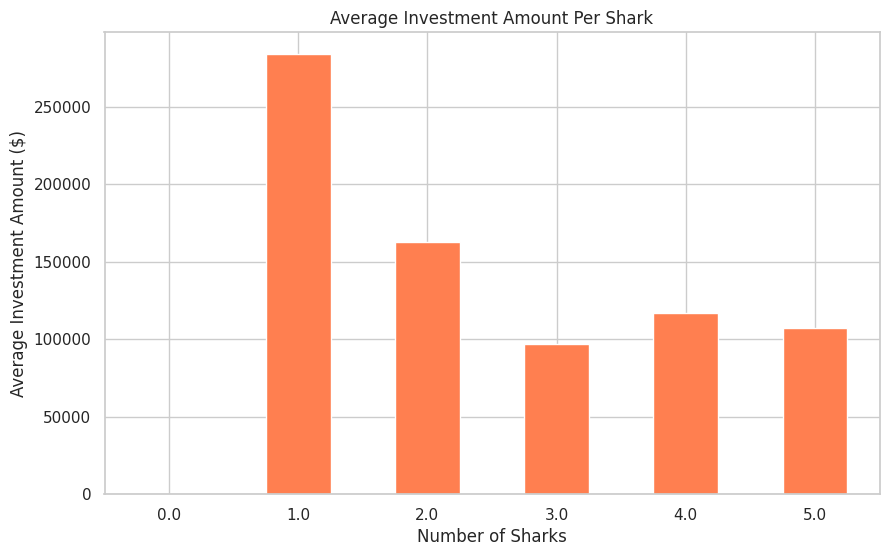

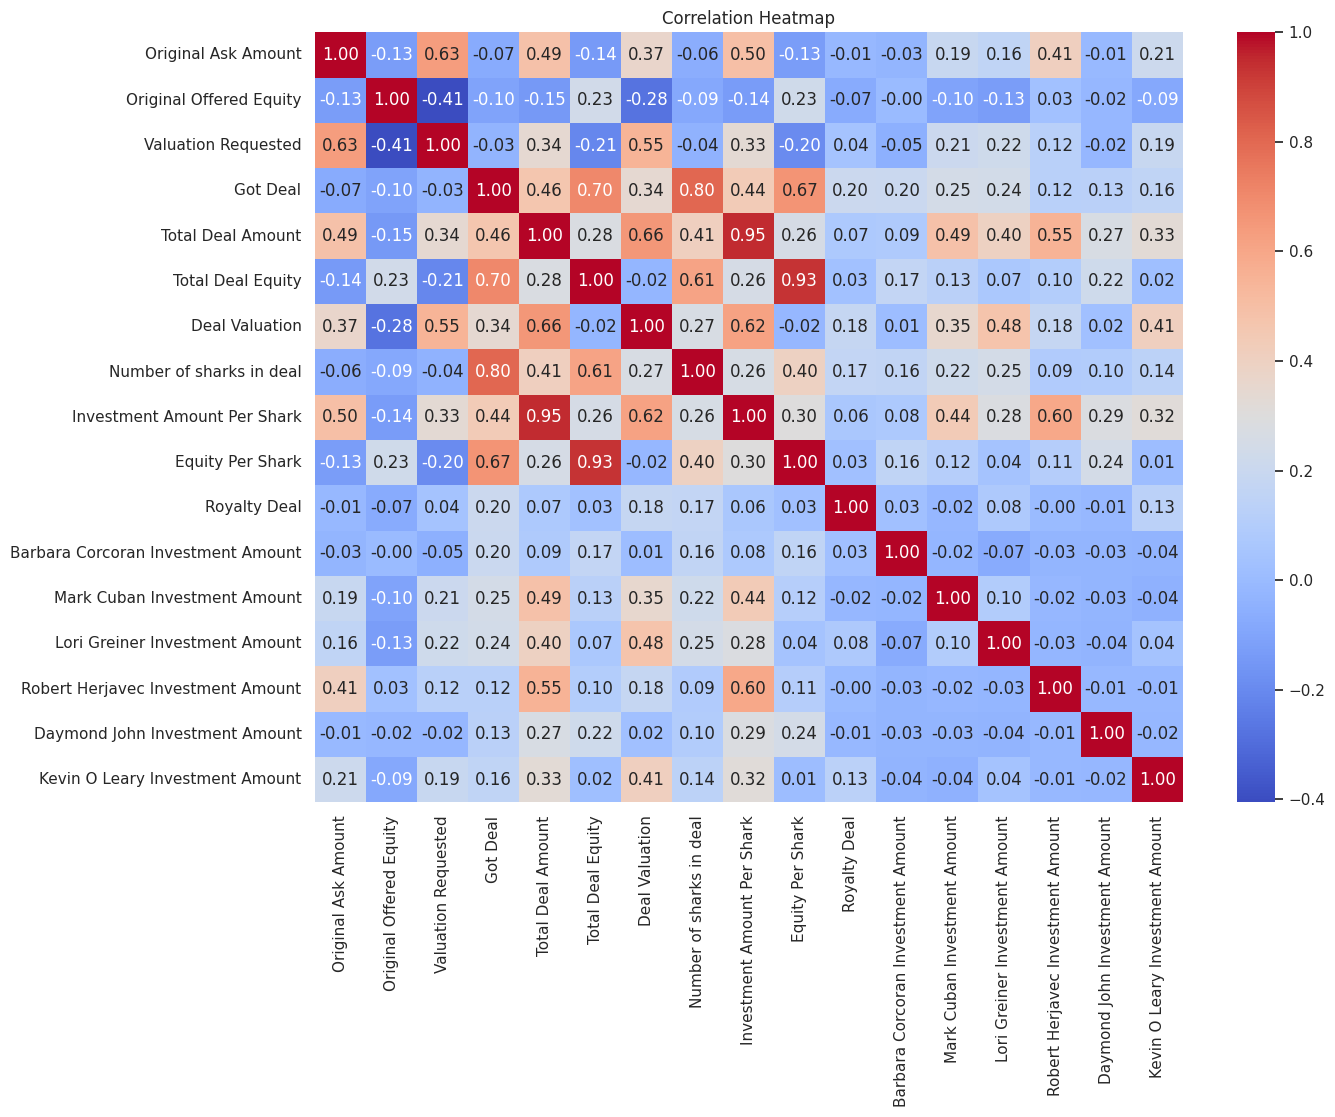


Summary of Key Insights:
1. Most common industries: Industry
Food and Beverage          276
Lifestyle/Home             228
Fashion/Beauty             217
Children/Education         118
Fitness/Sports/Outdoors    113
Name: count, dtype: int64
2. Highest average deal amount by industry:
Industry
Travel                 531818.181818
Liquor/Alcohol         393750.000000
Automotive             321470.588235
Media/Entertainment    297916.666667
Health/Wellness        271769.230769
Name: Total Deal Amount, dtype: float64
3. Total investments made by each investor:
Barbara Corcoran Investment Amount    1.771500e+07
Mark Cuban Investment Amount          5.942433e+07
Lori Greiner Investment Amount        4.324333e+07
Robert Herjavec Investment Amount     3.539733e+07
Daymond John Investment Amount        2.024983e+07
Kevin O Leary Investment Amount       2.816750e+07
dtype: float64


In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
file_path = 'Shark Tank US.csv'  # Replace with the correct dataset path
data = pd.read_csv(file_path)

# Step 1: Filter Relevant Columns
relevant_columns = [
    'Startup Name', 'Industry', 'Business Description', 'Original Ask Amount',
    'Original Offered Equity', 'Valuation Requested', 'Got Deal',
    'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation',
    'Number of sharks in deal', 'Investment Amount Per Shark',
    'Equity Per Shark', 'Royalty Deal'
]

investor_columns = [
    'Barbara Corcoran Investment Amount', 'Mark Cuban Investment Amount',
    'Lori Greiner Investment Amount', 'Robert Herjavec Investment Amount',
    'Daymond John Investment Amount', 'Kevin O Leary Investment Amount'
]

# Combine columns and remove 'Guest Name'
final_columns = relevant_columns + investor_columns
filtered_data = data[final_columns]

# Step 2: Handle Missing Values
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns
filtered_data[numerical_columns] = filtered_data[numerical_columns].fillna(0)

categorical_columns = filtered_data.select_dtypes(include=['object']).columns
filtered_data[categorical_columns] = filtered_data[categorical_columns].fillna("Unknown")
# Step 3: Save the Cleaned Dataset
filtered_data.to_csv('Cleaned_Shark_Tank_US.csv', index=False)

# Step 4: Analysis and Visualizations

# 1. Distribution of Startups by Industry
plt.figure(figsize=(12, 8))
sns.countplot(y='Industry', data=filtered_data, order=filtered_data['Industry'].value_counts().index)
plt.title('Distribution of Startups by Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

# 2. Percentage of Startups That Got a Deal
plt.figure(figsize=(6, 6))
deal_percentage = filtered_data['Got Deal'].value_counts(normalize=True) * 100
deal_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['No Deal', 'Got Deal'])
plt.title('Percentage of Startups That Got a Deal')
plt.ylabel('')
plt.show()

# 3. Average Deal Amount by Industry
avg_deal_by_industry = filtered_data.groupby('Industry')['Total Deal Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_deal_by_industry.plot(kind='bar', color='orange')
plt.title('Average Deal Amount by Industry')
plt.ylabel('Average Deal Amount ($)')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.show()

# 4. Total Investments by Each Investor
investor_columns_amount = [
    'Barbara Corcoran Investment Amount', 'Mark Cuban Investment Amount',
    'Lori Greiner Investment Amount', 'Robert Herjavec Investment Amount',
    'Daymond John Investment Amount', 'Kevin O Leary Investment Amount'
]
total_investment_by_investor = filtered_data[investor_columns_amount].sum()
plt.figure(figsize=(12, 8))
total_investment_by_investor.plot(kind='bar', color='purple')
plt.title('Total Investment by Each Investor')
plt.ylabel('Total Investment Amount ($)')
plt.xlabel('Investor')
plt.xticks(rotation=45)
plt.show()

# 6. Comparison of Valuation Requested vs. Deal Valuation
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Valuation Requested', y='Deal Valuation', data=filtered_data, hue='Got Deal')
plt.title('Valuation Requested vs. Deal Valuation')
plt.xlabel('Valuation Requested ($)')
plt.ylabel('Deal Valuation ($)')
plt.legend(title='Got Deal')
plt.show()

# 7. Distribution of Equity Offered Per Shark
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Equity Per Shark'], kde=True, bins=20, color='blue')
plt.title('Distribution of Equity Offered Per Shark')
plt.xlabel('Equity Per Shark (%)')
plt.ylabel('Frequency')
plt.show()

# 8. Total Investment Amount by Number of Sharks in a Deal
investment_by_sharks = filtered_data.groupby('Number of sharks in deal')['Total Deal Amount'].sum().sort_index()
plt.figure(figsize=(10, 6))
investment_by_sharks.plot(kind='bar', color='teal')
plt.title('Total Investment Amount by Number of Sharks in a Deal')
plt.xlabel('Number of Sharks')
plt.ylabel('Total Investment Amount ($)')
plt.xticks(rotation=0)
plt.show()

# 9. Average Investment Amount Per Shark
avg_investment_per_shark = filtered_data.groupby('Number of sharks in deal')['Investment Amount Per Shark'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_investment_per_shark.plot(kind='bar', color='coral')
plt.title('Average Investment Amount Per Shark')
plt.xlabel('Number of Sharks')
plt.ylabel('Average Investment Amount ($)')
plt.xticks(rotation=0)
plt.show()

# 10. Correlation Heatmap for Numerical Columns
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Final Summary of Findings
print("\nSummary of Key Insights:")
print(f"1. Most common industries: {filtered_data['Industry'].value_counts().head()}")
print(f"2. Highest average deal amount by industry:\n{avg_deal_by_industry.head()}")
print(f"3. Total investments made by each investor:\n{total_investment_by_investor}")